In [29]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('dataset_phishing.csv')

In [32]:
#testing
# Check the first few rows
print(df.head())
# Check for null values
print(df.isnull().sum())

# Display the columns in the dataset
print(df.columns)

                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                

In [35]:
# Convert all URLs to phishing = 1 and legitimate = 0
df['status'] = df['status'].apply(lambda x: 0 if x == 'legitimate' else 1)

In [37]:
# Check the distribution of labels
print(df['status'].value_counts())
# Fill missing numerical values with the mean of the respective column
#df = df.fillna(df.mean())

# Verify that no missing values remain
print(df.isnull().sum())

status
0    5715
1    5715
Name: count, dtype: int64
url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


In [39]:
from sklearn.preprocessing import StandardScaler

#Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

#Split features and labels
X = df.iloc[:, 1:-1]
y = df['status']

#Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
#Training the dataset
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(X_train.shape, X_test.shape)

(9144, 87) (2286, 87)


In [43]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nRecall:", recall)
print("\nF1-Score:", f1)
print("\nPrecision:", precision)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9448818897637795

Recall: 0.9255978742249779

F1-Score: 0.9431407942238267

Precision: 0.9613615455381784

Confusion Matrix:
 [[1115   42]
 [  84 1045]]


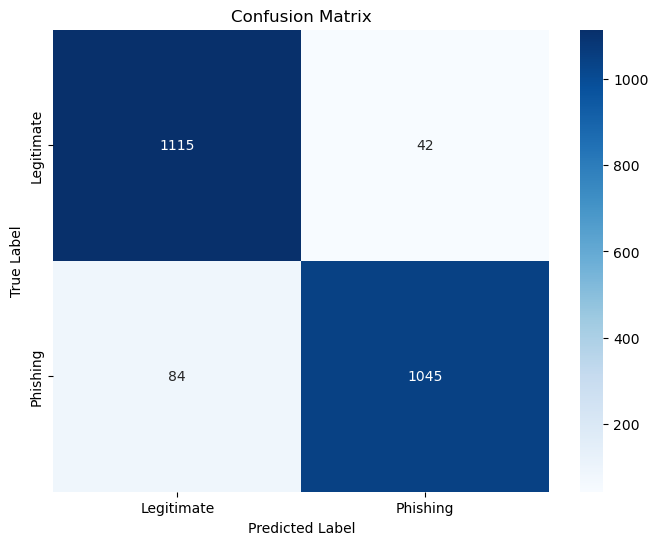

In [44]:
# prompt: give the code to display the confusion matrix for the above code in the form of a heatmap

import seaborn as sns

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

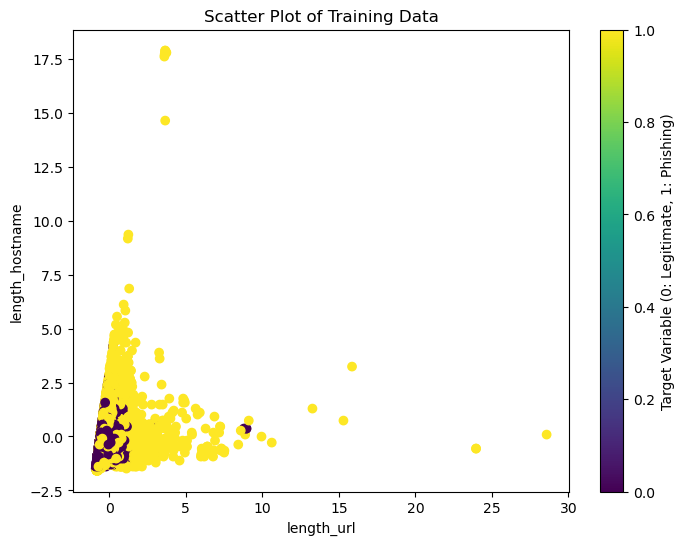

In [46]:
# prompt: give the code to visualise the training dataset using scatter plot

# Assuming you want to visualize the relationship between two features and the target variable

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')  # Replace 0 and 1 with desired feature indices
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Scatter Plot of Training Data')
plt.colorbar(label='Target Variable (0: Legitimate, 1: Phishing)')
plt.show()

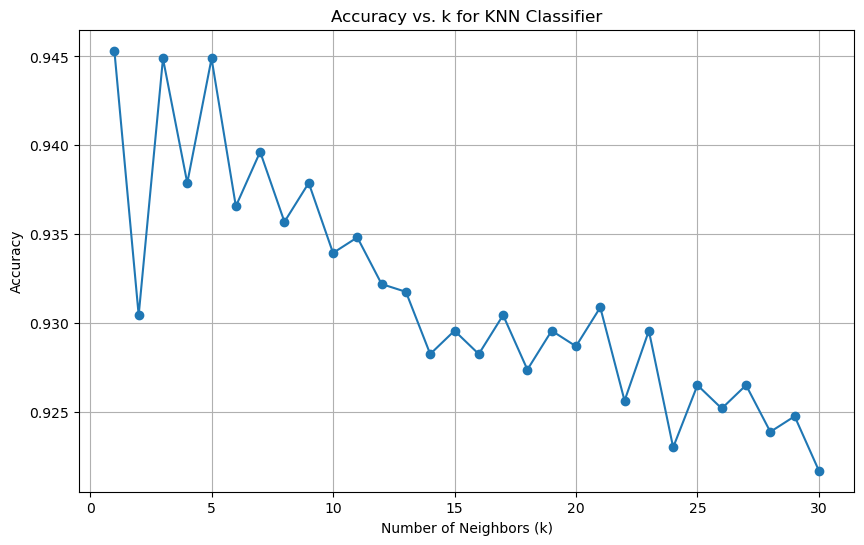

The best value of k is: 1


In [47]:
# prompt: give the code to visualise the best value of k using a line graph

k_values = range(1, 31)  # Test k values from 1 to 30
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Visualize the results with a line graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for KNN Classifier')
plt.grid(True)
plt.show()

# Find the best k value with the highest accuracy
best_k = k_values[np.argmax(accuracies)]
print(f"The best value of k is: {best_k}")

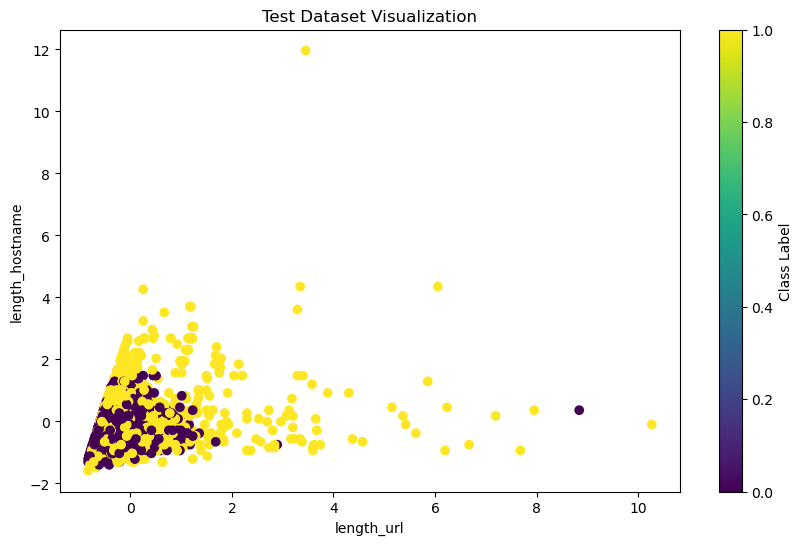

In [49]:
# prompt: give the code to visualise the test dataset using scatter plot

# Assuming X_test and y_test are your testing data and labels
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')  # Adjust indices 0 and 1 for the features you want to visualize
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Test Dataset Visualization')
plt.colorbar(label='Class Label')
plt.show()